## **Задача**

провести анализ логов с сайта GB, рассчитать некоторые из метрик и выявить инсайты, которые могут
быть полезны бизнесу.

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 0

In [56]:
df = pd.read_csv('../input/gb-data/GB.csv')
df_describe = pd.read_excel('../input/fields-gb/.xlsx')
df.head()

,session_id,claim,60sec,scroll_90,hit_date,referer_url,url,utm_source,utm_medium,gender,age,touch_screen,has_vk_id,has_ok_id
0,4358a11f0d16be6e,0,0,1,2021-12-01,https://gb.ru/education,https://gb.ru/comms/calendar,NaN,NaN,0,39,1,1,0
1,133509b7ff9a586c,0,0,0,2021-12-01,https://www.google.com/,https://gb.ru/courses/programming,google,cpc,-1,-1,2,0,0
2,8b23cd36f2b08dcd,0,0,0,2021-12-01,https://gb.ru/tests/352/trials/2238911/run,https://gb.ru/tests/352/trials/2238911,NaN,NaN,1,49,1,1,1
3,50de4c060fd128f3,0,1,1,2021-12-01,https://gb.ru/courses/1165,https://gb.ru/a/a1,NaN,NaN,-1,-1,1,1,0
4,c2ca3cc9a67c749b,0,0,0,2021-12-01,NaN,https://gb.ru/login,NaN,NaN,0,23,2,1,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884407 entries, 0 to 884406
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   session_id    884407 non-null  object
 1   claim         884407 non-null  int64 
 2   60sec         884407 non-null  int64 
 3   scroll_90     884407 non-null  int64 
 4   hit_date      884407 non-null  object
 5   referer_url   687598 non-null  object
 6   url           884407 non-null  object
 7   utm_source    245184 non-null  object
 8   utm_medium    244863 non-null  object
 9   gender        884407 non-null  int64 
 10  age           884407 non-null  int64 
 11  touch_screen  884407 non-null  int64 
 12  has_vk_id     884407 non-null  int64 
 13  has_ok_id     884407 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 94.5+ MB


In [58]:
df_describe

,Поле,Описание
0,session_id,идентификатор сессии
1,claim,"признак наличия отправки формы заявки во вемя текущей сессии (0 – нет заявки, 1 – заявка отправлена)"
2,60sec,"признак длительности сессии 60 секунд и более (0 – сессия менее 60 сек, 1 – сессия 60 сек и более)"
3,scroll_90,"признак вертикальной прокрутки страницы глубиной 90% (0 – прокрутка менее 90%, 1 – прокрутка 90% и более)"
4,hit_date,дата сессии
5,referer_url,адрес реферера страницы просмотра
6,url,адрес страницы просмотра
7,utm_source,utm-метка источника
8,utm_medium,utm-метка канала
9,gender,"пол посетителя из куки (-1 – не определен, 0 – мужской, 1 – женский)"


In [59]:
df_with_description = df.describe().T
df_describe = df_describe.merge(df_with_description,right_index=True,left_on='Поле')
df_describe

,Поле,Описание,count,mean,std,min,25%,50%,75%,max
1,claim,"признак наличия отправки формы заявки во вемя текущей сессии (0 – нет заявки, 1 – заявка отправлена)",884407.0,0.002071,0.045466,0.0,0.0,0.0,0.0,1.0
2,60sec,"признак длительности сессии 60 секунд и более (0 – сессия менее 60 сек, 1 – сессия 60 сек и более)",884407.0,0.313425,0.463886,0.0,0.0,0.0,1.0,1.0
3,scroll_90,"признак вертикальной прокрутки страницы глубиной 90% (0 – прокрутка менее 90%, 1 – прокрутка 90% и более)",884407.0,0.144197,0.351290,0.0,0.0,0.0,0.0,1.0
9,gender,"пол посетителя из куки (-1 – не определен, 0 – мужской, 1 – женский)",884407.0,-0.359456,0.808853,-1.0,-1.0,-1.0,0.0,1.0
10,age,возраст посетителя из куки (-1 – не определен),884407.0,14.844552,21.505421,-1.0,-1.0,-1.0,29.0,120.0
11,touch_screen,"touch экран (0 – не определен, 1 – нет, 2 – есть)",884407.0,1.436307,0.495927,1.0,1.0,1.0,2.0,2.0
12,has_vk_id,"наличие идентификатора профиля пользователя Вконтакте (0 – нет, 1 – есть)",884407.0,0.449500,0.497444,0.0,0.0,0.0,1.0,1.0
13,has_ok_id,"наличие идентификатора профиля пользователя Одноклассников (0 – нет, 1 – есть)",884407.0,0.124044,0.329631,0.0,0.0,0.0,0.0,1.0


##  Возраст

(array([506015.,  84118., 148098.,  74800.,  38999.,  20092.,   3610.,
          1110.,   2850.,   4715.]),
 array([ -1. ,  11.1,  23.2,  35.3,  47.4,  59.5,  71.6,  83.7,  95.8,
        107.9, 120. ]),
 <BarContainer object of 10 artists>)

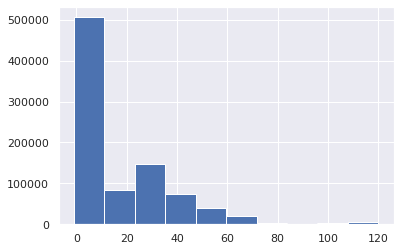

In [60]:
plt.hist(df['age'])

вероятно, возраст больше 80 указан ошибочно...
для коррекции этой ошибки будет выполнена группировка пользователей по возрастным группам

In [61]:
age_quantiles = df[df['age']>=0]['age'].quantile([0,0.25,0.5,0.75,1])
df['age_group'] = df['age'].apply(lambda x: np.argwhere([x <= y for y in age_quantiles])[0,0])
df['age_group']

0         3
1         0
2         4
3         0
4         1
         ..
884402    0
884403    1
884404    3
884405    0
884406    0
Name: age_group, Length: 884407, dtype: int64

In [62]:
print(f"При этом возраст неизвестен для {round((df[df['age']<=0][['age','age_group']].value_counts() / df.shape[0]).values[0]*100,2)}%")
df[df['age']<=0][['age','age_group']].value_counts()

При этом возраст неизвестен для 57.15%


age  age_group
-1   0            505397
dtype: int64

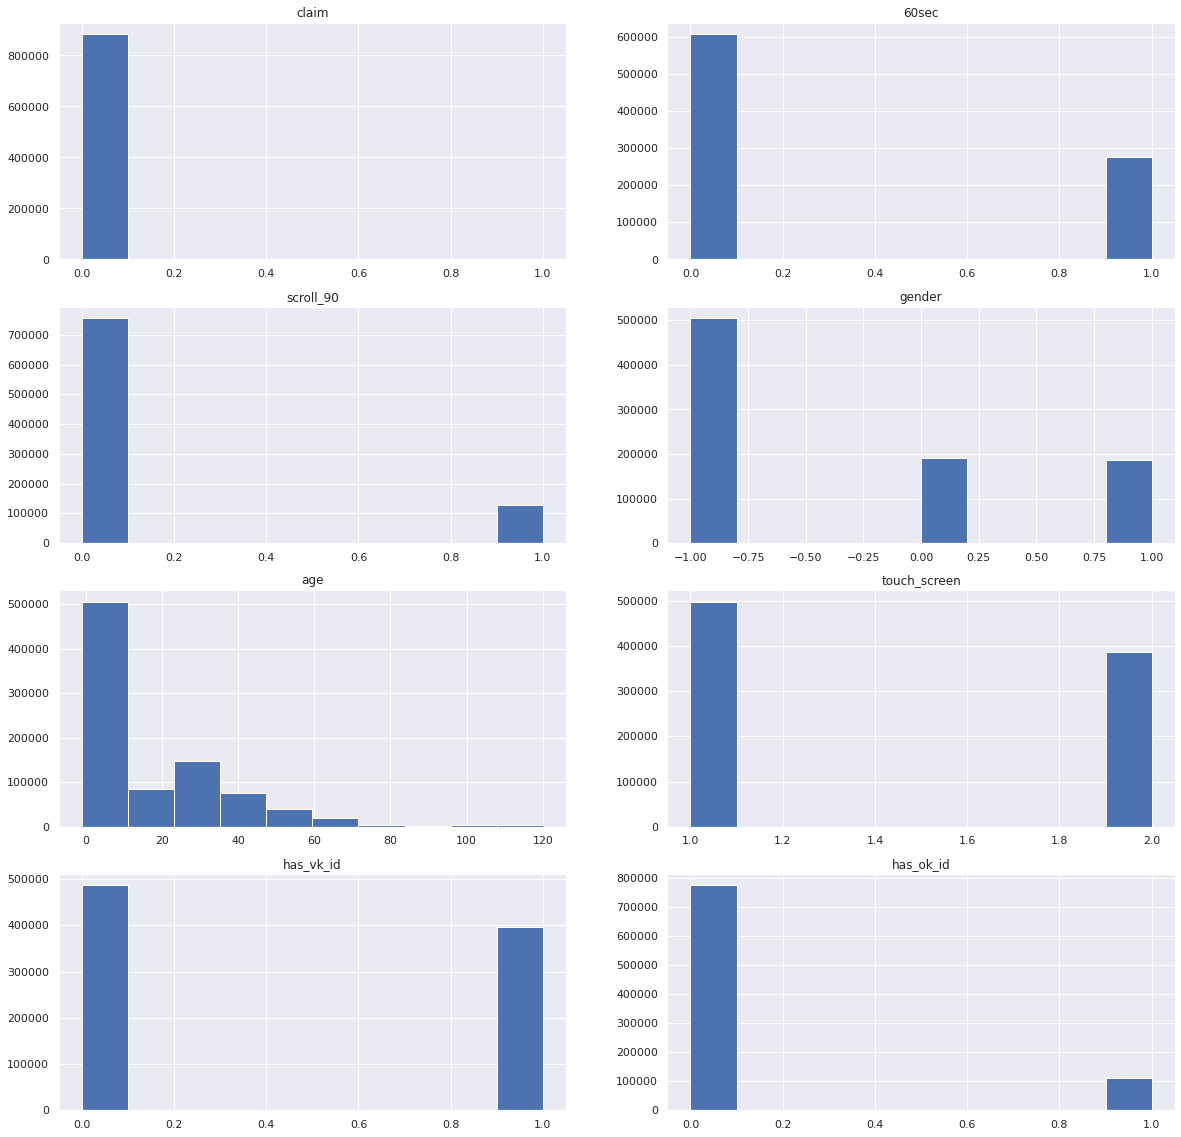

In [63]:
figure, axis = plt.subplots(4,2, figsize = (20,20),squeeze=True)

for k,i in enumerate(df_describe['Поле']):
    axis[k//2,k%2].hist(df[i])
    axis[k//2,k%2].title.set_text(i)
plt.show()

По представленным гистограммам можно сделать выводы:

- подавляющее число посещений не заканчивается отправкой формы;
- сессий, длящихся менее 1 минуты ~2/3 от общего количества посещений;
- скроллинг на глубину 90% и более происходит примерно в ~1/8 части посещений
- возраст: посещения выполняют, в основном, достаточно молодые посетители: в большинстве случаев до 40 лет или неопределенного возраста.
- чуть меньше половины посещений выполняется с устройствами с touch screen.
- чуть меньше половины посещений выполняется посетителями, имеющими аккаунт в vk.com
- подавляющая часть посещений выполняется посетителями, не имеющими аккаунт в ok.ru

в результате анализа планируется ответить на вопросы:

- какие посетители чаще отправляют форму
- какие посетители больше проводят времени на сайте;
- какие посетители чаще знакомятся с информацией на сайте (выполняют скроллинг + проводят больше времени)

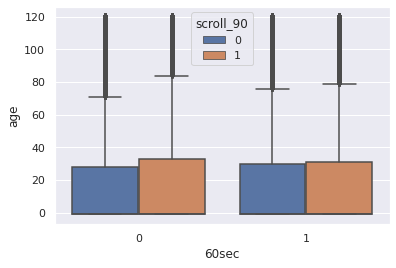

In [64]:
sns.set_theme(style = 'darkgrid')
sns.boxplot(y = df['age'], x=df['60sec'],hue = df['scroll_90']);

по данному графику можно сделать вывод, что скролят более 90 % несколько чаще те, кто проводит времени менее 60 секунд; т.е. прокручивают страницу почти до конца, ничего интересного для себя не находят - и уходят.

кроме этого, группы "скроллинга" и "длительности нахождения" не так сильно различаются по размеру, как хотелось бы... возможно, получится найти другое более хорошее разделение групп.

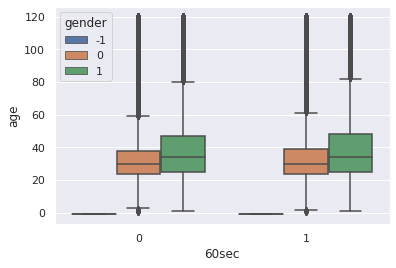

In [65]:
sns.boxplot(y = df['age'], x=df['60sec'],hue = df['gender']);

на этом графике видно, что женская часть аудитории на несколько старше мужской

в обоих группах возраст тех, кто находится на сайте дольше времени, несколько выше

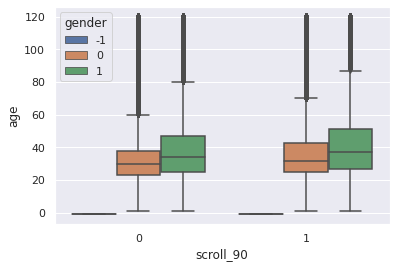

In [66]:
sns.boxplot(y = df['age'], x=df['scroll_90'],hue = df['gender']);

группа мужчин и женщин, которые скролят 90% и более, имеет чуть больший рост, чем те, которые этого не делают.

в обоих группах возраст тех, кто находится на сайте дольше времени, несколько выше

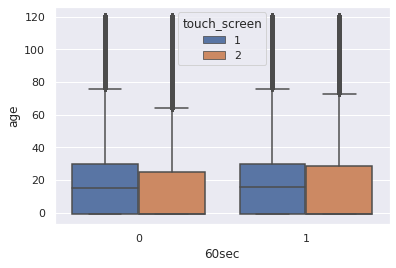

In [67]:
sns.boxplot(y = df['age'], x=df['60sec'],hue = df['touch_screen']);

видно, что по возрасту аудитории с тач-скринами и без них примерно равны

в группе без тач-скрина, которая находится на странице менее 60сек., возраст несколько ниже, чем в остальных группах: ниже медиана, третий квартиль, верхняя граница межквартильного размаха

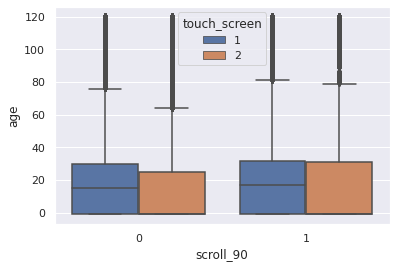

In [68]:
sns.boxplot(y = df['age'], x=df['scroll_90'],hue = df['touch_screen']);

видно, что по возрасту аудитории с тач-скринами и без них примерно равны

в группе без тач-скрина, которая просматривает менее 90% контента страницы, возраст несколько ниже, чем в остальных группах: ниже медиана, третий квартиль, верхняя граница межквартильного размаха

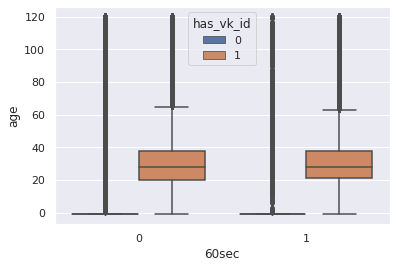

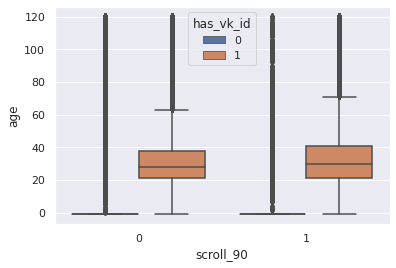

In [69]:
sns.boxplot(y = df['age'], x=df['60sec'],hue = df['has_vk_id']);
plt.show()
sns.boxplot(y = df['age'], x=df['scroll_90'],hue = df['has_vk_id']);
plt.show()

на этих двух графиках видно, что обладатели профиля в соц. сети Вконтакте, которые просматривают / не просматривают 90% страницы и более и находятся / не находятся на странице 60 секунд и более, имеют примерно одинковый возраст

при этом возраст обладателей такого профиля выше, чем у тех, у кого профиля в соц сети нет.

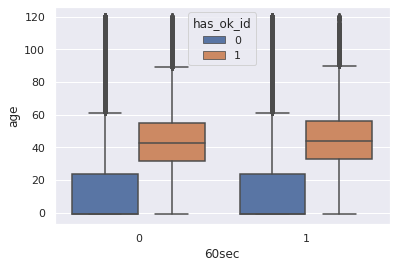

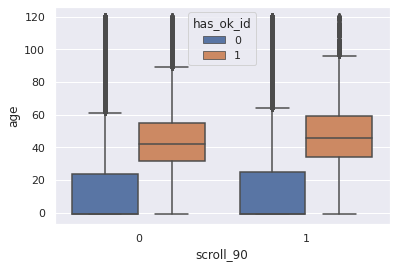

In [70]:
sns.boxplot(y = df['age'], x=df['60sec'],hue = df['has_ok_id']);
plt.show()
sns.boxplot(y = df['age'], x=df['scroll_90'],hue = df['has_ok_id']);
plt.show()

на этих двух графиках видно, что обладатели профиля в соц. сети Одноклассиники, которые просматривают / не просматривают 90% страницы и более и находятся / не находятся на странице 60 секунд и более, имеют примерно одинковый возраст

при этом возраст обладателей такого профиля выше, чем у тех, у кого профиля в соц сети нет.

In [71]:
df[['referer_url','url','utm_source']]

,referer_url,url,utm_source
0,https://gb.ru/education,https://gb.ru/comms/calendar,NaN
1,https://www.google.com/,https://gb.ru/courses/programming,google
2,https://gb.ru/tests/352/trials/2238911/run,https://gb.ru/tests/352/trials/2238911,NaN
3,https://gb.ru/courses/1165,https://gb.ru/a/a1,NaN
4,NaN,https://gb.ru/login,NaN
...,...,...,...
884402,https://gb.ru/education,https://gb.ru/courses/all,NaN
884403,https://gb.ru/,https://gb.ru/search,NaN
884404,NaN,https://gb.ru/s/edufree/besplatno,mt
884405,NaN,https://gb.ru/profportal,emarsys


In [72]:
df['referer_url'] = df['referer_url'].convert_dtypes()
df['ref_domain'] = df['referer_url'].apply(lambda x: x.split('/')[2] if not pd.isna(x) and len(x.split('//'))>1 else x)
df['ref_domain'] = df['ref_domain'].apply(lambda x: '.'.join(x.split('.')[-2:]) if not pd.isna(x) else x)

Text(0.5, 8.95999999999998, 'Domains')

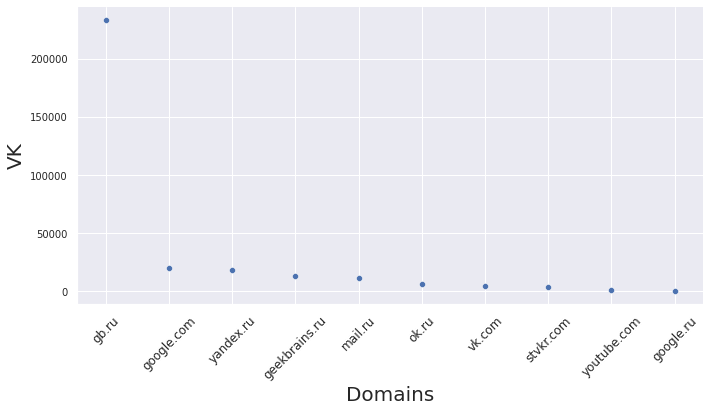

In [73]:
# 20 первых доменов
df_20_first_domains = df.groupby(['ref_domain'])[['has_vk_id','has_ok_id']].sum().sort_values(['has_vk_id','has_ok_id'],ascending = False).head(10)
# plt.figure(figsize=(250,20))
sns.relplot(x = df_20_first_domains.index,y = df_20_first_domains['has_vk_id'],height=5,aspect=2)
plt.ylabel('VK',fontdict={'size': 20})
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 12, rotation = 45)
plt.xlabel('Domains',fontdict={'size': 20})

по источникам видно, что большинство просмотров страниц произведено при переходе с других страниц портала gb.ru / geekbrains.ru

следующие по частоте - поисковые системы гугл и яндекс.

далее - почтовый сервис mail.ru, соц.сети и остальные сервисы.

по соц. сетям: больше переходов с ok.ru, чем с vk.com

Text(0.5, 8.95999999999998, 'Domains')

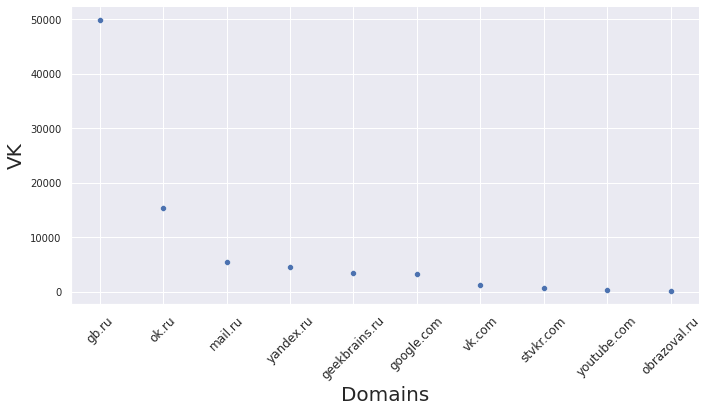

In [74]:
# 20 первых доменов
df_20_first_domains = df.groupby(['ref_domain'])[['has_vk_id','has_ok_id']].sum().sort_values(['has_ok_id', 'has_vk_id'],ascending = False).head(10)
# plt.figure(figsize=(250,20))
sns.relplot(x = df_20_first_domains.index,y = df_20_first_domains['has_ok_id'],height=5,aspect=2)
plt.ylabel('VK',fontdict={'size': 20})
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 12, rotation = 45)
plt.xlabel('Domains',fontdict={'size': 20})

Структура источников посещений та же:

* по источникам видно, что большинство просмотров страниц произведено при переходе с других страниц портала gb.ru / geekbrains.ru

* в этой группе большое количество посещений осуществлено с домена ok.ru (соц. сеть Одноклассники)

* следующие по частоте - почтовый сервис mail.ru, поисковые системы гугл и яндекс.

* далее - соц.сеть Вконтакте и остальные сервисы.

* **по соц. сетям**: больше переходов с ok.ru, чем с vk.com; эта разница еще более выражена в этой группе посетителей

In [75]:
df['hit_date'] = pd.to_datetime(df['hit_date'])
df['weekday'] = df['hit_date'].dt.weekday
df['week'] = df['hit_date'].dt.isocalendar().week
df['year'] = df['hit_date'].dt.isocalendar().year

In [76]:
df['year'].value_counts()

2021    884407
Name: year, dtype: Int64

In [77]:
df[['year','week']].value_counts()

year  week
2021  48      884407
dtype: int64

в наборе данных содержится информация только за 1 неделю одного года


In [78]:
df['weekday'].value_counts()

3    250158
2    227725
5    211636
4    194888
Name: weekday, dtype: int64

при этом, сохранена информация только за 4 дня из 7

Из-за небольшого объема выборки, показатели уникальных сессий за день ограничены 4мя днями; а показатель за неделю совпадает с показателем за месяц

In [79]:
print('DAU')
df.groupby('weekday')['session_id'].count()

DAU


weekday
2    227725
3    250158
4    194888
5    211636
Name: session_id, dtype: int64

In [80]:
print('WAU = MAU')
df.groupby('week')['session_id'].count()

WAU = MAU


week
48    884407
Name: session_id, dtype: int64

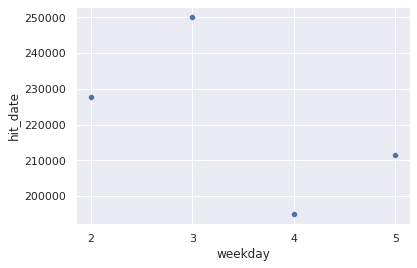

In [81]:
sns.scatterplot(x=df.groupby('weekday')['hit_date'].count().index,y=df.groupby('weekday')['hit_date'].count())
plt.xticks(ticks=df.groupby('weekday')['hit_date'].count().index);

In [82]:
df['page_url'] = df['url'].apply(lambda x: x.split('/')[3] \
                                 if len(x.split('/'))>3 and x.split('/')[3]!="" else "GB")

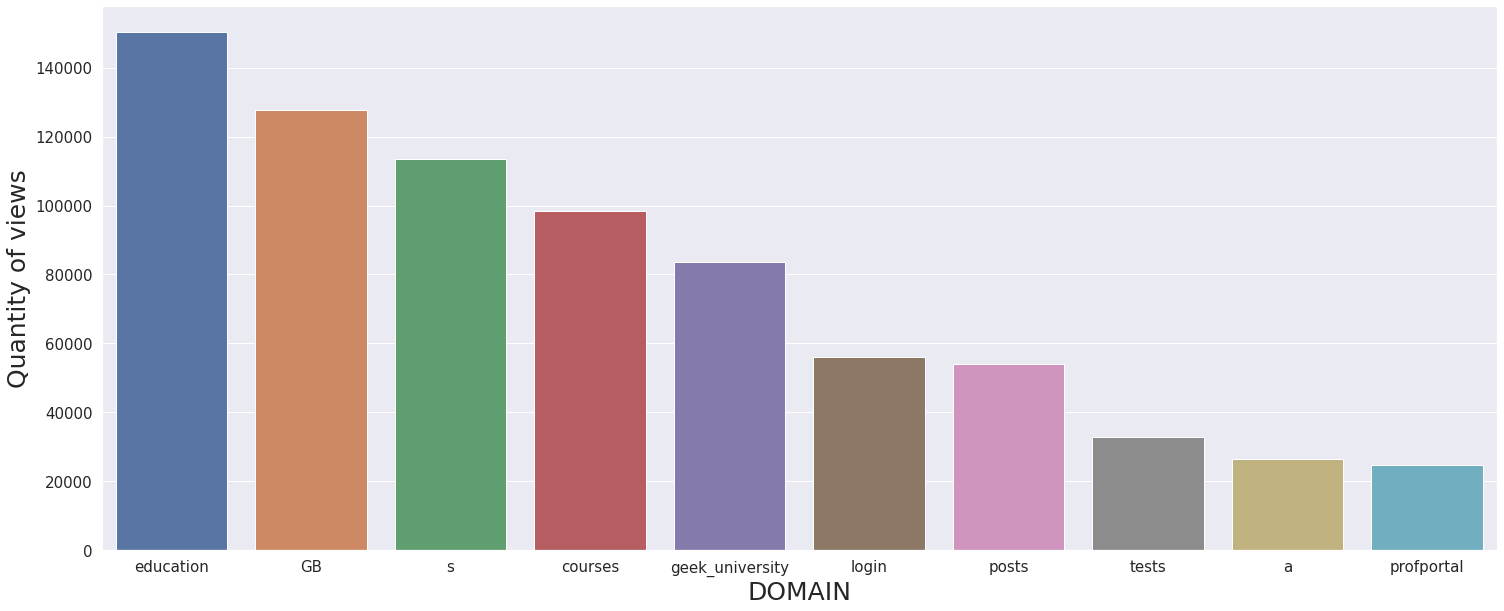

In [83]:
plt.figure(figsize=(25,10))
sns.barplot(x = df['page_url'].value_counts().head(10).index, y = df['page_url'].value_counts().head(10))
plt.xlabel('DOMAIN',fontsize=25)
plt.xticks(fontsize=15)
plt.ylabel('Quantity of views',fontsize=25)
plt.yticks(fontsize=15)
plt.show()

на данном графике видно, какие разделы сайта являются наиболее посещаемыми

In [84]:
df['page_url'].value_counts().head(10).index

Index(['education', 'GB', 's', 'courses', 'geek_university', 'login', 'posts',
       'tests', 'a', 'profportal'],
      dtype='object')

In [85]:
df_describe['Поле']

1     claim       
2     60sec       
3     scroll_90   
9     gender      
10    age         
11    touch_screen
12    has_vk_id   
13    has_ok_id   
Name: Поле, dtype: object

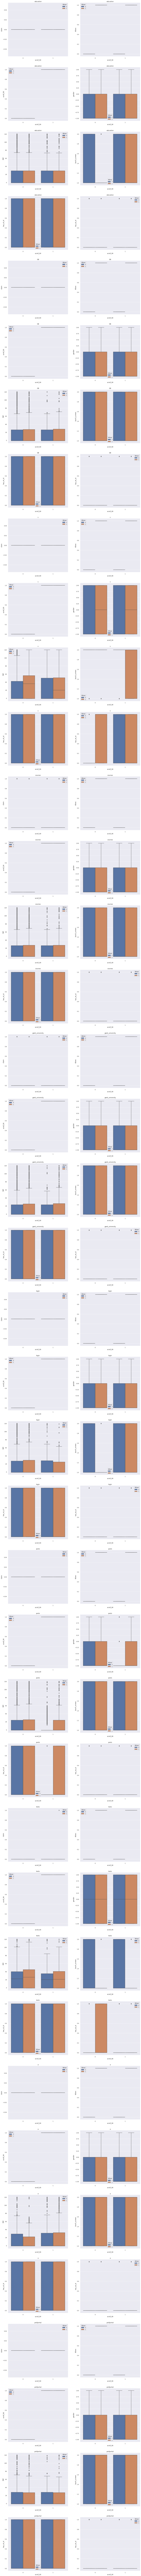

In [86]:
numerator = 10
figure, axis = plt.subplots(4*numerator,2, figsize = (20,400),squeeze=True)

for kk,partition in enumerate(df['page_url'].value_counts().head(10).index):
    for k,i in enumerate(df_describe['Поле']):
        k = k+kk*8
        sns.boxplot(y = df[df['page_url']==partition][i], x=df[df['page_url']==partition]['scroll_90'],hue = df[df['page_url']==partition]['60sec'], ax=axis[k//2,k%2]).set(title=partition)
plt.show()

In [87]:
print('Повторно учтенных посещений (полных дубликатов) в источнике данных:', df.duplicated().sum())


Повторно учтенных посещений (полных дубликатов) в источнике данных: 0


In [88]:
print('Top-10 разделов сайта')

pd.DataFrame(df['page_url'].value_counts().head(10)).reset_index().set_axis(['Раздел','Количество посетителей'],axis=1)

Top-10 разделов сайта


,Раздел,Количество посетителей
0,education,150241
1,GB,127618
2,s,113394
3,courses,98329
4,geek_university,83658
5,login,56110
6,posts,54028
7,tests,32953
8,a,26546
9,profportal,24768


**Раздел Education**

у пользователей, которые просматривают страницы на 90% и более 60 секунд, может быть или не быть touch-screen; причем, у тех, кто не просматривает 90% и более, touch-screen'а может не быть. Возможно, использование сайта с touch-screen-устройством является более удобным.

кроме того, у них почти одинаковое распределение возраста, и пола (чаще это мужчины или пользователи, не указавшие пол); эти пользователи могут иметь или не иметь аккаунт вконтакте; как правило, у них нет аккаунта в Одноклассниках.


**Главная страница**

Пользователи, просматривающие 90% и более, проводящие на странице более 60секунд или не делающие этого: преимущественно, это мужчины и пользователи, не указавшие свой пол.

пользователи, проводящие на странице более 60 секунд, имеют несколько больший возраст.

использование touch_screen возможно в всех группах по длительности просмотра страниц и % скроллинга. То же самое можно сказать и про наличие профиля в сети Вконтакте. Как правило, они не имеют профиль в Одноклассниках.

**S-раздел**

Раздел посещается мужчинами и женщинами (медиана на "0"), вне зависимости от продолжительности просмотра и глубины скроллинга.
Возраст тех, кто находится дольше в этом разделе, превышает возраст тех, кто смотрит страницу менее 60 секунд.

Пользователи, просматривающие страницу менее, чем на 90%, имеют touch_screen, тогда как те, кто просматривают больше 90% и более 60 секунд, могут иметь или не иметь touch-screen.

Наличие профиля Вконтакте не оказывает влияния на глубину скроллинга или длительность просмотра страницы.

Пользователи, просматривающие менее 90% и менее 60 секунд, чаще не имеют профиля в Одноклассниках.

**Раздел Courses и GeekUniversity**

Просматривают, в основном, мужчины или пользователи, не указавшие пол; на длительность просмотра или глубину скроллинга пол не оказывает влияния.

По возрасту: те, кто просматривают более 60секунд, чуть старше остальных. Наличие touch-screen не оказывает влияние на исследуемые параметры.

Наличие профиля Вконтакте не влияет на длительность просмотра и глубину скроллинга. То же самое - о наличии профиля в Одноклассниках; однако, среди просмотревших данный раздел пользователей, наличие профиля в Одноклассниках встречается реже.

**Раздел login**

В этот раздел попадают, в основном, мужчины или пользователи, не указавшие пол; на длительность просмотра или глубину скроллинга пол не оказывает влияния.

По возрасту: те, кто просматривают более 60секунд, чуть младше остальных. Просматривают меньше 90% (но более 60секунд) чаще те, у кого touch-screen нет. Этот раздел, скорее, "экран" входа, и вероятно, отсутсвие touch-screen просто удлиняет процесс авторизации.

Наличие профиля Вконтакте не влияет на длительность просмотра и глубину скроллинга. То же самое - о наличии профиля в Одноклассниках; однако, пользователи, имеющие профиль в Одноклассниках заходят в этот раздел реже.


**Раздел Posts**

Просматривают, в основном, мужчины или пользователи, не указавшие пол; на длительность просмотра или глубину скроллинга пол не оказывает влияния. При этом среди тех, кто просматривает раздел менее 60 секунд и скроллят более 90% страницы, чаще встречаются пользователи, которые не указали свой пол.

По возрасту: те, кто просматривают более 60секунд, старше остальных. А те, кто просматривает более 90% контента страницы и находится на ней менее 60 секунд моложе всех остальных групп. Наличие touch-screen не оказывает влияние на исследуемые параметры. 

Наличие профиля реже встречается у тех, кто просматривает более 90% контента страницы за менее, чем 60 секунд. Среди просмотревших данный раздел пользователей, наличие профиля в Одноклассниках встречается реже.


**Раздел Tests**

Мужчины и женщины, а также пользователи, не указавшие свой пол, одинаково часто пользуются этим разделом. Особенностей по глубине и скроллингу нет.

Возрастной состав групп: старше те пользователи, которые дольше задерживаются на странице. А также те, которые смотрят менее 90% контента страницы.

Пользователи, имеющие touch-screen, редко просматривают контент более 60 секунд.

По соцсетям: Вконтакте - без особенностей. Профиль в Однокласниках чаще имеют пользователи, которые просматривают менее 90%, но больше 60 секунд. У остальных, как правило, профиля в Одноклассниках нет.


**Раздел a**

В основном - мужчины или пользователи, не указавшие пол.

Те, кто просматривает менее 90% и более 60 секунд, моложе остальных. 

Touch-screen не влияет на состав групп по глубине скроллинга и длительности просмотра - также, как и наличие профиля Вконтакте. У большинства просмотревших раздел профиля в Одноклассниках нет.

**Раздел Profportal**

Пользователи: преимущественно, мужчины или не указавшие пол пользователи. Возраст в разных группах по глубине скроллинга и времени просмотра примерно одинаковый; наличие touch-screen на состав групп не влияет, как и наличие профиля Вконтакте. Профиль в Одноклассниках пользователи, как правило, не имеют.




In [89]:
df.columns

Index(['session_id', 'claim', '60sec', 'scroll_90', 'hit_date', 'referer_url',
       'url', 'utm_source', 'utm_medium', 'gender', 'age', 'touch_screen',
       'has_vk_id', 'has_ok_id', 'age_group', 'ref_domain', 'weekday', 'week',
       'year', 'page_url'],
      dtype='object')

In [90]:
views_in_session = pd.DataFrame(df.groupby('session_id',as_index=False)['page_url'].count()).sort_values('page_url',ascending=False).head(50)
views_in_session

,session_id,page_url
472223,8bf8f70b50764dbc,5
363479,6bd21d5c5947603e,5
553002,a3e748f7d764112a,5
755917,e011b989755dc33d,4
671769,c72817919cb2f2dd,4
398163,76172cb27b2f2dee,4
772035,e4c6f7b7f16e84df,4
433510,808e6b5d348dcdc7,4
339681,64c812519f6f7c88,4
484160,8f8312a4a116ee9d,4


In [91]:
repeat_in_session = pd.DataFrame(df.groupby('session_id',as_index=False)['page_url'].value_counts()).sort_values('count',ascending=False).head(50)
repeat_in_session

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

Повторно пользователи в рамках одной сессии заходят, обычно, в свой профиль (по 3 и более раз)

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = repeat_in_session['page_url'],y = repeat_in_session['count'],orient='v')
plt.title('Количество повторных просмотров за одну сессию')

In [ ]:
plt.figure(figsize=(15,7))
repeat_in_session = repeat_in_session.merge(df[['age','session_id']],on = 'session_id')
sns.barplot(x = repeat_in_session['page_url'],y = repeat_in_session['age'],orient='v')
plt.title('Количество повторных просмотров за одну сессию')


In [ ]:
plt.figure(figsize=(15,7))
views_in_session = views_in_session.merge(df[['age','session_id']],on = 'session_id')
sns.barplot(x = views_in_session['page_url'],y = views_in_session['age'],orient='v')
plt.title('Количество просмотров за одну сессию')


Из представленных выше графиков повторных просмотров можно сделать вывод, что чаще повторно просматривают страницы более взрослые пользовали.

Заметно выделяется количество повторных просмотров раздела Events.

In [ ]:
df['claim'].value_counts()

In [ ]:
print(f"количество пользователей, оставивших заявку, невелико: {round(df[df['claim']==1].shape[0] / df.shape[0],4) * 100}%")

In [ ]:
views_in_session = views_in_session.merge(df[['claim','session_id']],on = 'session_id')
views_in_session[views_in_session['claim']==1]

среди оставивших заявку, просмотров нескольких страниц не было

In [ ]:
df_claim = df[df['claim']==1]

figure, axis = plt.subplots(5,2, figsize = (20,40),squeeze=True)

for k,i in enumerate(list(df_describe['Поле'].values)+['age_group']):
    sns.boxplot(y = df_claim[i], x=df_claim['scroll_90'],hue = df_claim['60sec'], ax=axis[k//2,k%2]).set(title=i)
plt.show()

In [ ]:
df[df['claim']==1]['ref_domain'].value_counts()

**Вывод:**, заявки оставляют, как правило: мужчины или пользователи, не указавшие свой пол; просматривающие менее 90% страниц до 60секунд; пользователи, в основном, принадлежат первой возрастной группе, могут иметь или не иметь touch_screen и профиль Вконтакте. Приходят эти пользователи, в основном, со страниц GB  или поисковиков.